## Question 1 
The term hierarchical refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height. However, on an arbitrary data set, this assumption of hierarchical structure might be unrealistic. For instance, suppose that our observations correspond to a group of people with a 50–50 split of males and females, evenly split among Americans, Japanese, and French. We can imagine a scenario in which the best division into two groups might split these people by gender, and the best division into three groups might split them by nationality. In this case, the true clusters are not nested, in the sense that the best division into three groups does not result from taking the best division into two groups and splitting up one of those groups. Consequently, this situation could not be well-represented by hierarchical clustering. Due to situations such as this one, hierarchical clustering can sometimes yield worse (i.e. less accurate) results than K-means clustering for a given number of clusters.
The above context states a very important limitation of hierarchical clustering algorithm. Perform an experiment with simulated data or data of your selection to validate the above concept. (Note that you will not be judged based on the complexity of the data you are working with. Remember that, simpler the data better the explanation you can give. You will be marked based on the clarity of your communication and presentation). Include all necessary results.


In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import wikipedia
import os
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn
from sklearn.cluster import AgglomerativeClustering
import plotly.figure_factory as ff

In [2]:
#Reading the data
data = pd.read_csv("MI_Question1.csv")

In [3]:
data.head()

,Id,Gender,Occupation,Country
0,1,F,1,America
1,2,F,0,America
2,3,F,1,America
3,4,F,1,America
4,5,F,1,America


Data Description :
There are 4 columns and 20 rows : Id(Customer Id), Gender (F - female and M - male), Occupation (1 = Employee and 0 = Other) 
and City ( America, Canada and France)

In [4]:
Id=list(data["Id"])
clust_data=data.drop("Id",axis=1)
clust_data.head()

,Gender,Occupation,Country
0,F,1,America
1,F,0,America
2,F,1,America
3,F,1,America
4,F,1,America


In [5]:
clust_data=clust_data.drop("Occupation",axis=1)

In [6]:
# Creating dummy variable for categorical variables
clust=pd.get_dummies(clust_data,drop_first=True)
clust

,Gender_M,Country_Canada,Country_France
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,1


In [7]:
#clustering all data points
cluster = AgglomerativeClustering(n_clusters=3,linkage='single')
cluster.fit(clust)
cluster_final = pd.DataFrame(clust)
cluster_final['cluster'] = cluster.labels_
#cluster_final['Cust_id']= Id
cluster_final

,Gender_M,Country_Canada,Country_France,cluster
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,1,0,1,2


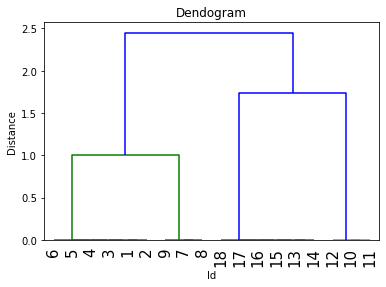

In [8]:
z =  linkage(cluster_final,'complete')
dendrogram(z,leaf_rotation=90,leaf_font_size=15,labels=Id)
plt.title("Dendogram")
plt.xlabel('Id')
plt.ylabel('Distance')
plt.show()

### Using k-means clustering 

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(clust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
cluster_k = pd.DataFrame(clust)
cluster_k["cluster"]=kmeans.labels_
cluster_k

,Gender_M,Country_Canada,Country_France,cluster
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,1,1
7,0,0,1,1
8,0,0,1,1
9,1,0,1,0


### Question 2 
Thus far, in all cluster analysis examples we have used Euclidean distance as the dissimilarity measure. But sometimes other dissimilarity measures might be preferred. For example, correlation-based distance considers two observations to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance. This is an unusual use of correlation, which is normally computed between variables; here it is computed between the observation profiles for each pair of observations. 

Correlation-based distance focuses on the shapes of observation profiles rather than their magnitudes. The choice of dissimilarity measure is very important, as it has a strong effect on the resulting dendrogram. In general, careful attention should be paid to the type of data being clustered and the scientific question at hand. These considerations should determine what type of dissimilarity measure is used for hierarchical clustering.

For instance, consider an online retailer interested in clustering shoppers based on their past shopping histories. The goal is to identify subgroups of similar shoppers, so that shoppers within each subgroup can be show items and advertisements that are particularly likely to interest them. Suppose the data takes the form of a matrix where the rows are the shoppers and the columns are the items available for purchase; the elements of the data matrix indicate the number of times a given shopper has purchased a given item (i.e. a 0 if the shopper has never purchased this item, a 1 if the shopper has purchased it once, etc.) What type of dissimilarity measure should be used to cluster the shoppers? If Euclidean distance is used, then shoppers who have bought very few items overall (i.e. infrequent users of the online shopping site) will be clustered together. This may not be desirable. On the other hand, if correlation-based distance is used, then shoppers with similar preferences (e.g. shoppers who have bought items A and B but never items C or D) will be clustered together, even if some shoppers with these preferences are higher-volume shoppers than others. Therefore, for this application, correlation-based distance may be a better choice.

Based on the idea presented elaborate and simplify the example provided about online retail



In [11]:
#Reading the data
sale_data = pd.read_csv("Sale.csv")

In [12]:
sale_data

,Customer,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,1,2,1,2,3,1,3,1,1,1,...,1,2,3,2,1,3,1,2,1,1
1,2,1,2,0,2,3,5,2,4,5,...,0,2,2,3,4,5,1,1,1,3
2,3,11,13,5,11,13,16,12,13,14,...,6,12,12,13,13,14,10,11,11,14
3,4,11,13,6,11,12,16,12,14,14,...,5,12,13,14,14,13,11,10,10,13
4,5,1,2,1,2,3,4,1,4,5,...,0,1,1,2,3,5,2,2,2,3
5,6,3,2,3,2,2,3,1,2,2,...,4,4,2,0,2,2,0,2,0,0


In [13]:
sale_data = sale_data.drop(columns=['Customer'])     # Dropping customer column
sale_data

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,2,1,2,3,1,3,1,1,1,1,1,2,3,2,1,3,1,2,1,1
1,1,2,0,2,3,5,2,4,5,3,0,2,2,3,4,5,1,1,1,3
2,11,13,5,11,13,16,12,13,14,14,6,12,12,13,13,14,10,11,11,14
3,11,13,6,11,12,16,12,14,14,14,5,12,13,14,14,13,11,10,10,13
4,1,2,1,2,3,4,1,4,5,3,0,1,1,2,3,5,2,2,2,3
5,3,2,3,2,2,3,1,2,2,4,4,4,2,0,2,2,0,2,0,0


In [14]:
trans_data = sale_data.T    # Transpose

In [15]:
trans_data

,0,1,2,3,4,5
item_1,2,1,11,11,1,3
item_2,1,2,13,13,2,2
item_3,2,0,5,6,1,3
item_4,3,2,11,11,2,2
item_5,1,3,13,12,3,2
item_6,3,5,16,16,4,3
item_7,1,2,12,12,1,1
item_8,1,4,13,14,4,2
item_9,1,5,14,14,5,2
item_10,1,3,14,14,3,4


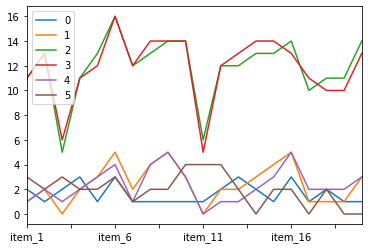

In [16]:
lines = trans_data.plot.line()      # Plot of the behavior of every customer

Observeation: Observe line orange and red follows the same trend

Assumption : Customer 1,2,3,4 follow the same trend (line : red, green, orange and purple)

#### Let's observe difference between clustering using euclidean and correlation based and validate which technique gives us better output

In [17]:
cluster_c = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')    # Defining the model

#### Part 1 : Clustering using euclidean distance on original dataframe


In [18]:
data_d = sale_data  # Creating copy of original data

In [19]:
cluster_c.fit(data_d)    # fitting the model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [20]:
data_d['Groups'] = cluster_c.labels_

In [21]:
data_d

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,...,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,Groups
0,2,1,2,3,1,3,1,1,1,1,...,2,3,2,1,3,1,2,1,1,3
1,1,2,0,2,3,5,2,4,5,3,...,2,2,3,4,5,1,1,1,3,2
2,11,13,5,11,13,16,12,13,14,14,...,12,12,13,13,14,10,11,11,14,0
3,11,13,6,11,12,16,12,14,14,14,...,12,13,14,14,13,11,10,10,13,0
4,1,2,1,2,3,4,1,4,5,3,...,1,1,2,3,5,2,2,2,3,2
5,3,2,3,2,2,3,1,2,2,4,...,4,2,0,2,2,0,2,0,0,1


#### Part 2 : Correlation distance based clustering

In [22]:
corr = trans_data.corr()     # Create correlation matrix
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5
0,1,0.129769,0.0817626,0.104159,0.021011,0.199601
1,0.129769,1,0.844171,0.837835,0.889562,-0.0515985
2,0.0817626,0.844171,1,0.955063,0.707046,-0.186195
3,0.104159,0.837835,0.955063,1,0.662862,-0.197205
4,0.021011,0.889562,0.707046,0.662862,1,-0.146201
5,0.199601,-0.0515985,-0.186195,-0.197205,-0.146201,1


We can see that customer 2 and 3 are highly correlated (0.948..) and customer 1 and 4 are nearly correlated to customer 2 and 4, but customer 0 and 5 are very lighly correlated to customer 1,2,3,4

In [23]:
cluster_c.fit(corr)   # fitting model on correlation matrix

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [24]:
corr['Groups'] = cluster_c.labels_

In [25]:
corr

,0,1,2,3,4,5,Groups
0,1.000000,0.129769,0.081763,0.104159,0.021011,0.199601,2
1,0.129769,1.000000,0.844171,0.837835,0.889562,-0.051599,0
2,0.081763,0.844171,1.000000,0.955063,0.707046,-0.186195,1
3,0.104159,0.837835,0.955063,1.000000,0.662862,-0.197205,1
4,0.021011,0.889562,0.707046,0.662862,1.000000,-0.146201,0
5,0.199601,-0.051599,-0.186195,-0.197205,-0.146201,1.000000,3


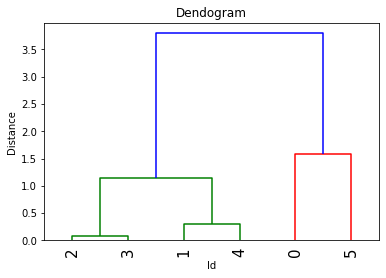

In [26]:
z =  linkage(corr,'complete')
dendrogram(z,leaf_rotation=90,leaf_font_size=15)
plt.title("Dendogram")
plt.xlabel('Id')
plt.ylabel('Distance')
plt.show()

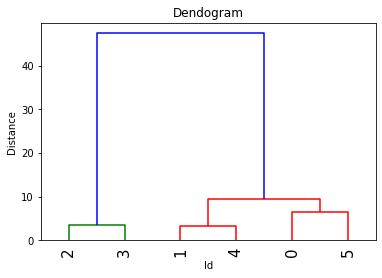

In [27]:
z =  linkage(data_d,'complete')
dendrogram(z,leaf_rotation=90,leaf_font_size=15)
plt.title("Dendogram")
plt.xlabel('Id')
plt.ylabel('Distance')
plt.show()

#### Conclusion :
Part 1 : Clustering using euclidean distance : we can see that 2 clusters are form, one having customer 2 and 3 and other rest customer. But we know that customer 1,2,3,4 follow same as show in above figure. This technique only calculated the distance between customers and clustered it

Part 2 : Correlation based clustering : Unlike above method, in this method we first created an correlation matrix and then fitted the model on that matrix. Hence the output shown above, it percisely clubed customer 1,2,3,4 into one one cluster.

Hence, before applying any clustering technique we must know the data and what we are trying to get from the modelling technique.

Note : Defining the parameters such as n_clusters and linkage is a crucial part. We might get incorrect output if we don't enter the parameters precisely.

## Question 3
Linkage defines the dissimilarity between two groups of observations. The three most common types of linkage—complete, average and single. Average, complete, and single linkage are most popular among statisticians. Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms. 

Unsupervised techniques are often used in the analysis of genomic data. Consider the NCI60 cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines. You need to hierarchically cluster the cell lines in the NCI60 data, with the goal of finding out whether or not the observations cluster into distinct types of cancer. To begin, we standardize the variables to have mean zero and standard deviation one.

“The choice of linkage certainly does affect the results obtained. Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage tend to yield more balanced, attractive clusters.”  Perform cluster analysis on the NC160 data and validate the statement and comment on your observations.


In [28]:
#Reading the data
df = pd.read_csv("NCI60.csv")

In [29]:
df.head()

,Cancer_Types,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,CNS,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,CNS,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,CNS,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,RENAL,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.390000e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,BREAST,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [30]:
types=df.Cancer_Types.unique()

In [31]:
types

array(['CNS', 'RENAL', 'BREAST', 'NSCLC', 'UNKNOWN', 'OVARIAN',
       'MELANOMA', 'PROSTATE', 'LEUKEMIA', 'K562B-repro', 'K562A-repro',
       'COLON', 'MCF7A-repro', 'MCF7D-repro'], dtype=object)

In [32]:
data = df.drop(columns=['Cancer_Types'])

In [33]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.390000e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [34]:
#Standardise the data
std_data = data.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [35]:
std_data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992


In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean')  
cluster.fit_predict(std_data)

array([ 1,  1,  1,  1, 10, 10, 10, 10,  0,  8,  8,  8,  8,  8,  8,  8,  8,
        7,  7, 13, 11, 11,  0,  0, 12, 12,  4,  0,  0,  0,  0,  0,  0,  5,
        6,  6,  6,  5,  9,  9,  5,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,
        3,  4,  0,  0,  2,  2,  2,  1,  2,  2,  2,  2,  2], dtype=int64)

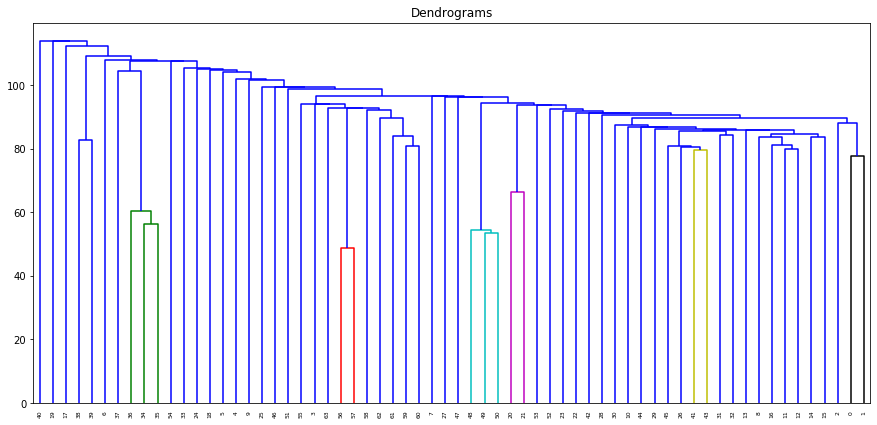

In [37]:
plt.figure(figsize=(15,7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(std_data, method='single'))

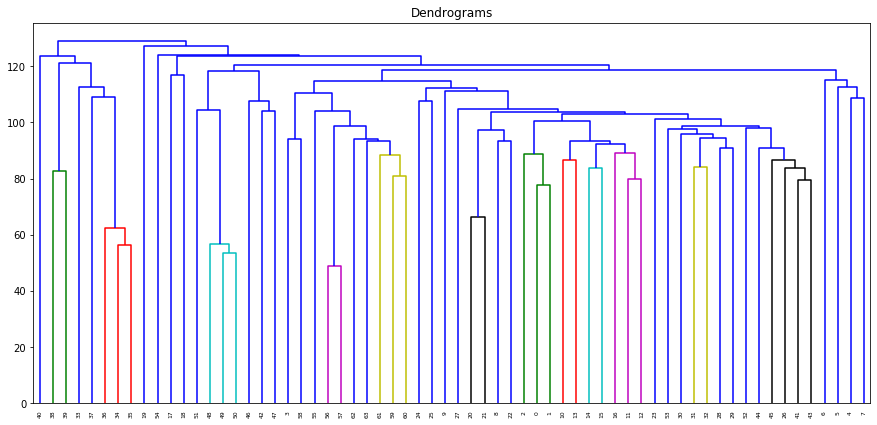

In [38]:
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(std_data, method='average'))

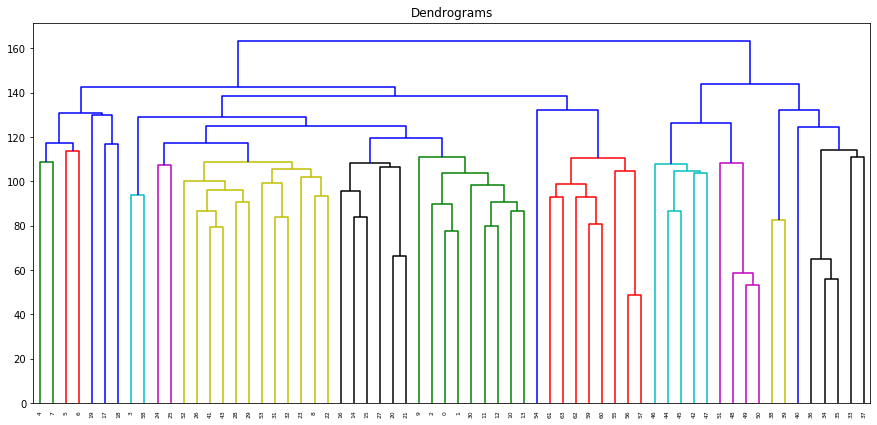

In [39]:
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(std_data, method='complete'))

Observe the difference between the dendogram from single, average and complete linkage. As we can see that average and complete linkage tend to yeild more balance, hence are mostly preferred.

## Question 4
1)	Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.
2)	Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
3)	Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
4)	What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.


In [40]:
#Reading the data
df = pd.read_csv("USArrest.csv")

In [41]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### 1)	Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states. 

In [42]:
arrest_data = df.drop(columns=['State'])

In [43]:
arrest_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [44]:
state=list(df['State'])

In [45]:
state

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [46]:
arrest_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
arrest_cluster.fit(arrest_data)
arrest_df = pd.DataFrame(arrest_data)
arrest_df['cluster'] = arrest_cluster.labels_
#arrest_df['State']= state
arrest_df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,2


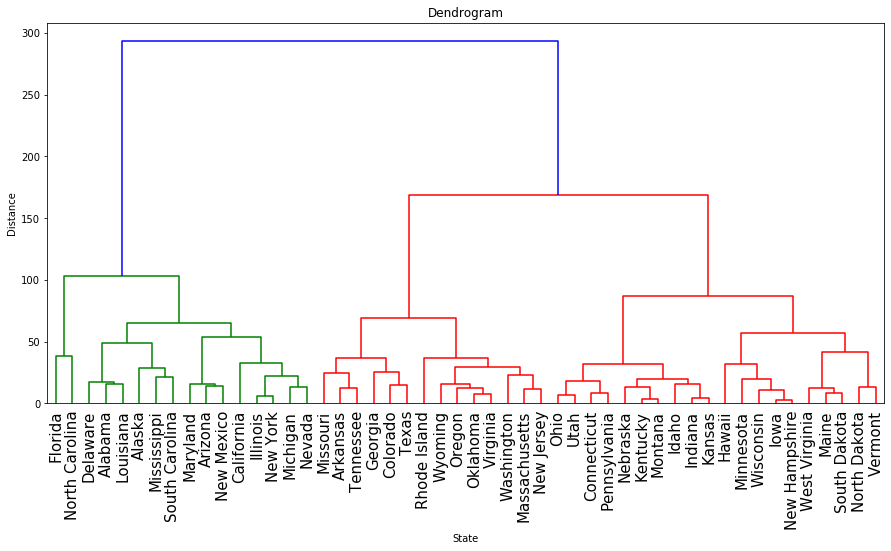

In [47]:
plt.figure(figsize=(15,7))
z =  linkage(arrest_df,'complete')
dendrogram(z,leaf_rotation=90,leaf_font_size=15,labels=state)
plt.title("Dendrogram")
plt.xlabel('State')
plt.ylabel('Distance')
plt.show()

### 2)	Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters? 

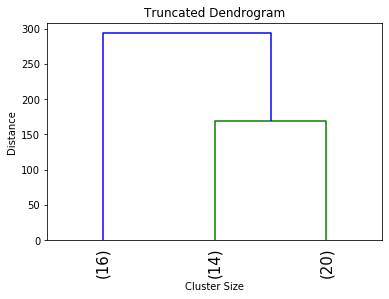

In [48]:
dendrogram(z,truncate_mode='lastp',p=3,leaf_rotation=90, leaf_font_size=15., labels=state)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

### 3)	Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one. 

In [49]:
arrest_std=df

In [50]:
arrest_std.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
arrest_std = arrest_std.drop(columns=['State'])

In [52]:
#Standardise the data
arrest_std = arrest_std.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [53]:
arrest_std.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [54]:
arrest_std_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
arrest_std_cluster.fit(arrest_std)
arrest_std_df = pd.DataFrame(arrest_std)
arrest_std_df['cluster'] = arrest_std_cluster.labels_
arrest_std_df['State']= state
arrest_std_df

,Murder,Assault,UrbanPop,Rape,cluster,State
0,1.255179,0.790787,-0.526195,-0.003451,0,Alabama
1,0.513019,1.118060,-1.224067,2.509424,0,Alaska
2,0.072361,1.493817,1.009122,1.053466,2,Arizona
3,0.234708,0.233212,-1.084492,-0.186794,1,Arkansas
4,0.281093,1.275635,1.776781,2.088814,2,California
5,0.025976,0.402909,0.869548,1.883901,2,Colorado
6,-1.040880,-0.736484,0.799761,-1.092723,1,Connecticut
7,-0.437875,0.815030,0.450825,-0.585834,1,Delaware
8,1.765415,1.990786,1.009122,1.150530,2,Florida
9,2.229265,0.487757,-0.386621,0.492653,0,Georgia


### 4)	What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer. 

In [55]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [56]:
arrest_data4 = df.drop(columns=['State'])

In [57]:
arrest_data4.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [58]:
#Standardise the data
arrest_data4_std = arrest_data4.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [59]:
state

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [60]:
arrest_cluster4 = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
arrest_cluster4.fit(arrest_data4_std)
arrest_df = pd.DataFrame(arrest_data4_std)
arrest_df['cluster'] = arrest_cluster4.labels_
#arrest_df['State']= state
arrest_df

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,0
2,0.072361,1.493817,1.009122,1.053466,2
3,0.234708,0.233212,-1.084492,-0.186794,1
4,0.281093,1.275635,1.776781,2.088814,2
5,0.025976,0.402909,0.869548,1.883901,2
6,-1.040880,-0.736484,0.799761,-1.092723,1
7,-0.437875,0.815030,0.450825,-0.585834,1
8,1.765415,1.990786,1.009122,1.150530,2
9,2.229265,0.487757,-0.386621,0.492653,0


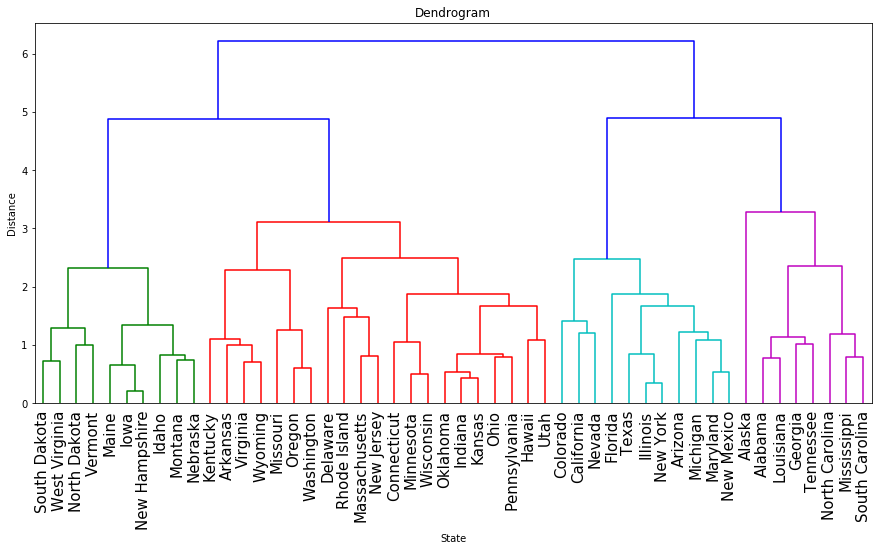

In [61]:
plt.figure(figsize=(15,7))
z =  linkage(arrest_df,'complete')
dendrogram(z,leaf_rotation=90,leaf_font_size=15,labels=state)
plt.title("Dendrogram")
plt.xlabel('State')
plt.ylabel('Distance')
plt.show()

### Question 5 
Both K-means and hierarchical clustering will assign each observation to a cluster. However, sometimes this might not be appropriate. For instance, suppose that most of the observations truly belong to a small number of (unknown) subgroups, and a small subset of the observations are quite different from each other and from all other observations. Then since K Means and hierarchical clustering force every observation into a cluster, the clusters found may be heavily distorted due to the presence of outliers that do not belong to any cluster. Mixture models are an attractive approach for accommodating the presence of such outliers.

Design an experimental problem to validate the distortion of clusters might be a result due to the presence of outliers. (Designing an experimental data having only 2-dimension will do. This is just of illustration. Use proper visualization and possible use of colour encodings).

At the end of the context is mentioned about mixture models. Find out a little more about it, like what is mixture models, what is the intuitive idea behind such models, etc.


In [62]:
data_o = pd.read_csv('Question2 5.csv')

In [63]:
data_o

,x,y
0,92,20
1,88,52
2,106,86
3,169,80
4,76,44
5,72,49
6,67,57
7,10,41
8,115,44
9,73,55


In [64]:
x = data_o.x
y = data_o.y
data_o1 = data_o
data_o2 = data_o

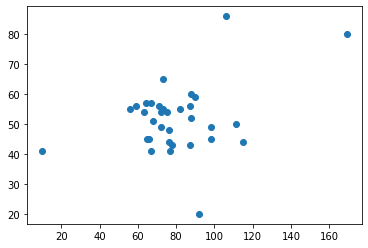

In [65]:
plt.scatter(x, y)

#### Fitting Agglomerative Clustering

In [66]:
h_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='single')

In [67]:
h_cluster.fit(data_o1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=4)

In [68]:
data_o1['Groups'] = h_cluster.labels_

In [69]:
data_o1

,x,y,Groups
0,92,20,0
1,88,52,0
2,106,86,3
3,169,80,1
4,76,44,0
5,72,49,0
6,67,57,0
7,10,41,2
8,115,44,0
9,73,55,0


#### Fitting K means clustering

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(data_o2)

In [71]:
data_o2['Groups'] = kmeans.labels_

In [72]:
data_o2

,x,y,Groups
0,92,20,6
1,88,52,1
2,106,86,5
3,169,80,2
4,76,44,7
5,72,49,7
6,67,57,0
7,10,41,3
8,115,44,4
9,73,55,0


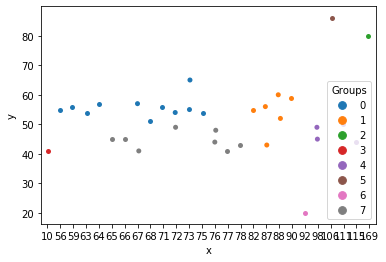

In [73]:
import seaborn as sns
sns.stripplot(x=data_o2.x, y=data_o2.y, hue=data_o2.Groups)
plt.show()


K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. However, with hierarchical clustering, you will most definitely get the same clustering results.

#### Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.

## Question 6 :

### 1)  List down down some issues in cluster analysis.
Solution :

#### i. Manually adjusting parameters such as n_cluster, linkage, dissimilarity measure is crucial part in cluster analysis.
Let's consider the example from Question 2 Part 2, we will demonstrate using same data and changing the parameters.
As we have created the data, we know customer 1,2,3,4 should be club together into one cluster which is out desired output after fitting the model. (we achived this in Question 2 solution) But due to entering wrong parameters such as n_clusters = 6 (which should be 3 or 4) and linkage = complete (which is suppose to be average), we got the incorrect clusters(). Shown in above figure Compare both models and clusters after fiiting to see the difference.

#### ii.  Pre processing of the data before fiiting the model.
As we saw in Question 2, we need to create a correlation matrix before fitting the model to get the desire or accurate output.
And in 

#### iii. What effect does scaling the variables have on the clustering obtained.

#### iv. Where should we cut the dendogram in order to obtain clusters.

#### v. In case of K-means clustering, how many clusters should we look for in the data.


Each of these small decisions have a strong impact on the result obtained.

### 2) 	What are the advantages and limitations of Hierarchical cluster analysis?
Solution :

#### Advantages :
- Hierarchical clustering has added advantage over K-mean clustering in that it result in an attractive tree based representation of the observations, called as Dendogram.
- Hierarchical clustering does not require that we commit to a particular choice of K
- Hierarchical is Flexible. Hierarchical Clustering can give diﬀerent partitionings depending on the level-of-resolution we are looking for.


#### Limitation :
- Not works well on large data, difficult to interpret dendogram for large data size.You will not be able to clearly visualize the final output. You can still use this to check at which point the item was split into different categories.
- As the number of records increase the performance of hierarchical algorithm goes decreasing and time for execution increased 



### 3) 	What are the advantages and limitations of K-Means clustering?
Solution :

#### Advantages :
- Good for large data size.
- K means is scalable
- Centroids are easy to understand and use

#### Limitation:
- One potential disadvantage of K-means clustering is that it requires us to pre specify the number of clusters.
- Cannot use for flexible data.
- K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency.
- K-means clustering is usually more eﬃcient run-time wise.
- Sensitive to outliers - Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering. (Question 5).
- Different initial partitions can result in different final clusters.

